# Lab 2 - Data
---
**Summer 2025 - Intructor: Joyce Yang**

**Adapted from teaching materials by Prof. Chris Volinksy Fall 2024.**

**This notebook focused on data!**

In this notebook, we will walk through
1. Exploration Data Analysis (EDA)


While consistent practice is essential to becoming a good programmer, it is equally important to learn how to find and understand the right code—not just rely on AI tools.
Starting with this notebook and continuing through the rest of the course materials, I will include links to relevant Python function documentation. You will learn how to read official documentation and when to apply different functions effectively.

**Before we begin, remember to save this notebook IN YOUR OWN GOOGLE DRIVE**.  That way you have your own copy to work on, edit and share.



## Exploration Data Analysis (EDA)
In this section, I will guide you step by step through the processes of data exploration and data preparation. While this is not a complete representation of everything you will encounter in real-world scenarios, these foundational steps are crucial for any data analysis or machine learning workflow.

### Introduction to Python Packages and Some Build-in Functions

Python has a ton of packages that make doing complicated stuff very easy.

Packages contain pre-defined functions (built-in) that make our life easier!  We've seen pre-defined functions before, for example, the function 'str()' that we used to convert numbers into strings in the Python Basics notebook.

In this class we will use five packages frequently:

- **`numpy`** (pronounced num-pie) is used for doing "math stuff", such as complex mathematical operations (e.g., square roots, exponents, logs), operations on matrices, and more. [Documentation](https://numpy.org/doc/)
- **`pandas`** is a data manipulation package. It lets us store data in a data frame--which is the basic data structure used in data analytics. More on this soon.[Documentation](https://pandas.pydata.org/pandas-docs/stable/)
- **`sklearn`** is a machine learning and data science package. It lets us do fairly complicated machine learning tasks, such as building regression or probability estimation models with only a few lines of code. (Nice!) [Documentation](https://scikit-learn.org/stable/index.html)
- **`matplotlib`** is a data visualization package.  It lets you make plots and graphs directly from your code. This can be a secret weapon when combined with notebooks, as you can very easily rerun analyses on different data or with slightly different code, and the graphs can just appear magically.  (Ok, always easier said than done, but you get the idea.) [Documentation](https://matplotlib.org/stable/index.html)
- **`seaborn`** is an extension to matplotlib that helps make your plots look more appealing.[Documentation](https://seaborn.pydata.org/)



As we use these through the semester, their usefulness will become increasingly apparent.

To make the contents of a package available, you need to **import** it:

In [ ]:
# Load package and assign to shorter variable name
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# this trick is required to get plots to display inline with the rest of your notebook,
# not in a separate window
%matplotlib inline

### Load Data with Pandas

Pandas takes the main data structures of Python  and organizes them into a format that makes data analysis very convenient - **DATAFRAMES**

A Dataframe is 2-dimensional data structure with columns of potentially different types, along with column and row labels. You can consider Dataframe as excel sheet or tables. Along with the data, you can optionally pass index (row labels) and columns (column labels) arguments.  (technically, Pandas data frames are made from an abstraction of lists that Pandas used called "series" - for more details you can [look here](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html) )

Pandas data frames can be constructed from most common data sources a data scientist will encounter: csv files, excel spreadsheets, sql databases, json, url pointers to other data sources, and even from other data already stored in one's python code.

Data sets often contain different types of data, and may have names associated with the rows or columns.  Data frames are perfect for this type of data - often read in from a CSV or Excel spreadsheet.  

We can think of a data frame as a sequence of arrays of identical length; these are the columns. Entries in the different arrays can be combined to form a row.


You can read data in from a file online using the URL, or from a local file on your computer that has been downloaded.  

For more info on accessing data through APIs, see [Getting Data Through APIs](https://colab.research.google.com/drive/1jDBkbG8yEAaEAGEzNIQVa4LRbXeuqEWt)


#### College Dataset Loading

In this lab, we will use a dataset called 'College', which is a CSV file. Now, our analysis start with
1. Downloading dataset to your local machine
2. Upload the dataset to colab
3. Read the dataset into Python with Pandas

##### Download Dataset to Local
[Clicking on this link](https://www.statlearning.com/s/College.csv) to download the data file called `College.csv` to local machine

##### Upload the Dataset to CoLab

There are two ways to upload the dataset to Colab:
1. Interface
2. Code

**Interface**
Click on the folder icon 📁 on the left menu bar. Then click on the file icon with the up arrow `upload`. Lastly, select the dataset file from your local machine folder.

**Code**:

In [ ]:
# Now, run the following code and "Choose Files" to upload the file into Colab:

from google.colab import files
uploaded = files.upload()

Saving College.csv to College.csv


##### Task 1: Read the dataset into Python with Pandas
A useful function to load dataset with Python is . Note that `pd` is a self-defined short-hand for `pandas`, which we indicated during import by `import pandas as pd`.

Here is the documentation for [`pd.read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). In documentation, you will be able to see
1. What are the potential parameters?
2. What is the output format?
3. How to use the code in the simplest way?

**Task 1** Now read the `College` into a pandas data frame with `pd.read_csv()`.

Hint: If you open the `College.csv`, you will find out that the first column has no header (column name). Apparently, this column can be viewed as identification, which is similar to ID. You can convert the first column into index by setting the index parameter `index_col`

In [ ]:
college=pd.read_csv("College.csv",index_col=0)
print(college.head)

<bound method NDFrame.head of                                Private   Apps  Accept  Enroll  Top10perc  \
Abilene Christian University       Yes   1660    1232     721         23   
Adelphi University                 Yes   2186    1924     512         16   
Adrian College                     Yes   1428    1097     336         22   
Agnes Scott College                Yes    417     349     137         60   
Alaska Pacific University          Yes    193     146      55         16   
...                                ...    ...     ...     ...        ...   
Worcester State College             No   2197    1515     543          4   
Xavier University                  Yes   1959    1805     695         24   
Xavier University of Louisiana     Yes   2097    1915     695         34   
Yale University                    Yes  10705    2453    1317         95   
York College of Pennsylvania       Yes   2989    1855     691         28   

                                Top25perc  F.Undergrad  P

### Exploring Data

In this session, we will learn different functions for data exploring. Following are the variables and its meaning:

- Private : Public/private indicator
- Apps : Number of applications received
- Accept : Number of applicants accepted
- Enroll : Number of new students enrolled
- Top10perc : New students from top 10 % of high school class
- Top25perc : New students from top 25 % of high school class
- F. Undergrad : Number of full-time undergraduates
- P.Undergrad : Number of part-time undergraduates
- Outstate : Out-of-state tuition
- Room.Board : Room and board costs
- Books : Estimated book costs
- Personal : Estimated personal spending
- PhD : Percent of faculty with Ph.D.s
- Terminal : Percent of faculty with terminal degree
- S.F.Ratio : Student/faculty ratio
- perc.alumni : Percent of alumni who donate
- Expend : Instructional expenditure per student
- Grad.Rate : Graduation rate

#### Task 2
Show first or last 10 samples in the dataset to have a basic understanding of the data. Use [`DataFrame.head()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html)  or [`DataFrame.tail()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.tail.html)function.

In [ ]:
print(college.head())
print(college.tail())

                             Private  Apps  Accept  Enroll  Top10perc  \
Abilene Christian University     Yes  1660    1232     721         23   
Adelphi University               Yes  2186    1924     512         16   
Adrian College                   Yes  1428    1097     336         22   
Agnes Scott College              Yes   417     349     137         60   
Alaska Pacific University        Yes   193     146      55         16   

                              Top25perc  F.Undergrad  P.Undergrad  Outstate  \
Abilene Christian University         52         2885          537      7440   
Adelphi University                   29         2683         1227     12280   
Adrian College                       50         1036           99     11250   
Agnes Scott College                  89          510           63     12960   
Alaska Pacific University            44          249          869      7560   

                              Room.Board  Books  Personal  PhD  Terminal  \
Abilene Ch

#### Task 3
Now let's see a general summary on columns and data type. Use [`DataFrame.info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html) function.

In [ ]:
print(college.info())

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

#### Task 4
Next, let's see a rough summary on each features. Use [`DataFrame.describe()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) function.

In [ ]:
print(college.describe())

               Apps        Accept       Enroll   Top10perc   Top25perc  \
count    777.000000    777.000000   777.000000  777.000000  777.000000   
mean    3001.638353   2018.804376   779.972973   27.558559   55.796654   
std     3870.201484   2451.113971   929.176190   17.640364   19.804778   
min       81.000000     72.000000    35.000000    1.000000    9.000000   
25%      776.000000    604.000000   242.000000   15.000000   41.000000   
50%     1558.000000   1110.000000   434.000000   23.000000   54.000000   
75%     3624.000000   2424.000000   902.000000   35.000000   69.000000   
max    48094.000000  26330.000000  6392.000000   96.000000  100.000000   

        F.Undergrad   P.Undergrad      Outstate   Room.Board        Books  \
count    777.000000    777.000000    777.000000   777.000000   777.000000   
mean    3699.907336    855.298584  10440.669241  4357.526384   549.380952   
std     4850.420531   1522.431887   4023.016484  1096.696416   165.105360   
min      139.000000      

#### Task 5: Missing Data
Now, let's navigate into missing values. How many missing values of each column? *Answer with print or text*

Hint: try to use [`DataFrame.isna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html) and [`DataFrame.sum()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html)

In [ ]:
missing_vals = college.isna().sum()
print(missing_vals)

Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64


#### Other Useful Functions

- rename variables: [DataFrame.rename()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html)
- check distinct value in categorical variables: [DataFrame.value_counts()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html)
- Number of rows and columns: [DataFrame.shape()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html)
- Missing Value:
  - [pandas.isnull()](https://pandas.pydata.org/docs/reference/api/pandas.isnull.html)
  - [pandas.notnull()](https://pandas.pydata.org/docs/reference/api/pandas.notnull.html)
  - [pandas.isna()](https://pandas.pydata.org/docs/reference/api/pandas.isna.html)
  - [pandas.notna()](https://pandas.pydata.org/docs/reference/api/pandas.notna.html)
- ...

Feel free to explore other functions.



### Preparing or Processing Data

In this session, we will learn different functions to modify and select sample or columns in DataFrame. One important component of pandas is indexing and selecting components of the data. This is a extremely rich topic, so we'll only touch on it here.Please check the [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html) for more information.

#### Task 6
Select `Outstate` column using the `.column_name` notation.


In [ ]:
column_name = college['Outstate']
print(column_name)

Abilene Christian University       7440
Adelphi University                12280
Adrian College                    11250
Agnes Scott College               12960
Alaska Pacific University          7560
                                  ...  
Worcester State College            6797
Xavier University                 11520
Xavier University of Louisiana     6900
Yale University                   19840
York College of Pennsylvania       4990
Name: Outstate, Length: 777, dtype: int64


#### Task 7
- Change column name `S.F.Ratio` into `S_F_Ratio`.

Hint: rename variables: [DataFrame.rename()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html)

Note: for columns with `.` in the name, you may want to change the column name in order to avoid process issues.




In [ ]:
new_name = college.rename(columns={'S.F.Ratio':'S_F_Ratio'},inplace=True)
print(college.columns)

Index(['Private', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S_F_Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate'],
      dtype='object')


#### Task 8
- Please select `Accept` and `Enroll`.
- What is the type of output after selection?

Hint: Select two columns by their name with two brackets `[[]]`.

In [ ]:
column_names = college[['Accept','Enroll']]
print(column_names)


                                Accept  Enroll
Abilene Christian University      1232     721
Adelphi University                1924     512
Adrian College                    1097     336
Agnes Scott College                349     137
Alaska Pacific University          146      55
...                                ...     ...
Worcester State College           1515     543
Xavier University                 1805     695
Xavier University of Louisiana    1915     695
Yale University                   2453    1317
York College of Pennsylvania      1855     691

[777 rows x 2 columns]


#### Task 9
- Select the row with row number 5.
- Select the top 6 rows.
- Select the row with name `Amherst College`.

Hint: For selecting rows from the data there are two options:
- [`.loc`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html): for selecting rows based on the _row label_.
- [`.iloc`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html): for selecting rows based on the _row number_

In [ ]:
print(college.loc['Amherst College'])
print(college.iloc[5])
print(college.iloc[:6])


Private          Yes
Apps            4302
Accept           992
Enroll           418
Top10perc         83
Top25perc         96
F.Undergrad     1593
P.Undergrad        5
Outstate       19760
Room.Board      5300
Books            660
Personal        1598
PhD               93
Terminal          98
S_F_Ratio        8.4
perc.alumni       63
Expend         21424
Grad.Rate        100
Name: Amherst College, dtype: object
Private          Yes
Apps             587
Accept           479
Enroll           158
Top10perc         38
Top25perc         62
F.Undergrad      678
P.Undergrad       41
Outstate       13500
Room.Board      3335
Books            500
Personal         675
PhD               67
Terminal          73
S_F_Ratio        9.4
perc.alumni       11
Expend          9727
Grad.Rate         55
Name: Albertson College, dtype: object
                             Private  Apps  Accept  Enroll  Top10perc  \
Abilene Christian University     Yes  1660    1232     721         23   
Adelphi University    

#### Task 10
- Select rows that have an Outstate tuition less that $5k

In [ ]:
low_Outstate = college[college['Outstate'] < 5000]
print(low_Outstate)

                                        Private  Apps  Accept  Enroll  \
Arkansas Tech University                     No  1734    1729     951   
Bemidji State University                     No  1208     877     546   
Brewton-Parker College                      Yes  1436    1228    1202   
Brigham Young University at Provo           Yes  7365    5402    4615   
Central Missouri State University            No  4681    4101    1436   
Claflin College                             Yes  1196     697     499   
Delta State University                       No   967     945     459   
Dickinson State University                   No   434     412     319   
East Texas Baptist University               Yes   379     341     265   
Jersey City State College                    No  2957    1423     691   
Lamar University                             No  2336    1725    1043   
Lander University                            No  1166    1009     510   
Lincoln University                           No  16

#### Task 11
- Return the index of rows that have an Outstate tuition less that $5k
- What's the difference between using `pandas.DataFrame.index` and `numpy.where()`

Very often, the index is very more important than the row instance.

Hint: use [`pandas.DataFrame.index`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.index.html) or [`numpy.where()`](https://numpy.org/doc/stable/reference/generated/numpy.where.html)

In [ ]:
print(low_Outstate.index)
print(np.where(college["Outstate"] < 5000)[0])

Index(['Arkansas Tech University', 'Bemidji State University',
       'Brewton-Parker College', 'Brigham Young University at Provo',
       'Central Missouri State University', 'Claflin College',
       'Delta State University', 'Dickinson State University',
       'East Texas Baptist University', 'Jersey City State College',
       'Lamar University', 'Lander University', 'Lincoln University',
       'Livingstone College', 'Louisiana Tech University',
       'Mankato State University', 'Mayville State University',
       'Mississippi University for Women', 'Missouri Southern State College',
       'Montclair State University', 'Moorhead State University',
       'Morris College', 'Murray State University',
       'Northeast Missouri State University',
       'Northwest Missouri State University', 'Peru State College',
       'Prairie View A. and M. University', 'Ramapo College of New Jersey',
       'Rowan College of New Jersey', 'Saint Cloud State University',
       'South Dakota St

#### Task 12
- Create a new variable (`AcceptPerc`) which is number of Acceptances `Accept` over Total Applications `Apps`, and add it to the `college_df` data frame

This is part of feature engeering -- creating new variables that we believe/hope will be predictive of some target.


In [ ]:
college["AcceptPerc"] = college["Accept"] / college["Apps"]

#### Task 13
- identify the cars with the top 3 AcceptPerc values
- identify the cars with the bottom 3 AcceptPerc values

Hint: use [`pandas.DataFrame.nlargest`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nlargest.html) and [`pandas.DataFrame.nsmallest`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nsmallest.html)

In [1]:
top3 = college.nlargest(3, "AcceptPerc")
print("Top 3 AcceptPerc colleges:")
print(top3[["AcceptPerc"]])
bottom3 = college.nsmallest(3, "AcceptPerc")
print("\nBottom 3 AcceptPerc colleges:")
print(bottom3[["AcceptPerc"]])

NameError: name 'college' is not defined

#### Other Useful Functions

- Dummy encoding:
  - [pandas.get_dummies()](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)
  - [sklearn.preprocessing.OneHotEncoder()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)
- check distinct value in categorical variables: [DataFrame.value_counts()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html)
- Number of rows and columns: [DataFrame.shape()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html)
- Missing Value Imputation:
  - [pandas.DataFrame.dropna()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)
  - [pandas.DataFrame.fillna()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html)
  - [sklearn.impute.SimpleImputer()](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html)
  - [sklearn.impute.IterativeImputer()](https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html)

Feel free to explore other functions.

## Data Visualization

In this session, we will learn the coding for data visualization. I will **no longer include direct links** to relevant Python function documentation， since you should have been farmiliar with these packages. Instead, I will provide the **names of the necessary functions**.It is your responsibility to **search for and identify the correct official documentation** (e.g., using Google, not GenAI). I understand that this process might feel time-consuming, but trust me—the payoff is well worth it in the long run.

First let's import all needed packages.

In [1]:
import os
import calendar
import numpy as np
import networkx as nx
import pandas as pd
from pandas.plotting import scatter_matrix, parallel_coordinates
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pylab as plt

### Import King County Housing Data

We're going to use the King County Housing dataset from Kaggle which includes homes sold between May 2014 and May 2015. Each record (row) represents a specific property sold in the King County (Seattle) area.

Please [download this file](https://drive.google.com/uc?export=download&id=1gJKDv2seqeijYe3616wg5wxHdOmSj041) to your local machine.

In [2]:
from google.colab import files
uploaded = files.upload()

Saving KingCountyHousing.csv to KingCountyHousing.csv


In [3]:
housing_df = pd.read_csv("KingCountyHousing.csv")

Here is the description of the columns of the data frame:

* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
*  long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

### Basic Charts: Bar Charts, Line Graphs, and Scatter Plots

Here we will plot some simple graphs to give insight into the features we can use in modelling.

Our target is price, lets look at that first.

#### Task 14: Histogram
Since `price` is numeric, let us use histogram to show the distribution of target.

Hint: `matplotlib` is the package that can be used to draw graphs. For histogram, you may want to explore `hist()` function. Please noticed that the default `hist()` is very ugly. You can play with `edgecolor` and `bins` arguments in `hist`. Make sure that you label the graph with `xlabel`

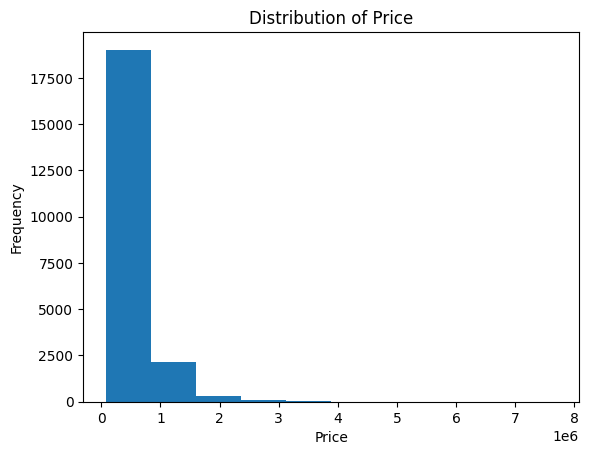

In [4]:
plt.hist(housing_df["price"])
# Add labels and title
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Distribution of Price")

# Show the plot
plt.show()

#### Task 15: Histogram
From Task 1, you may noticed that the distribution is ver skewed. You couldn't learn more from that histogram. It would be helpful to "normalize" it via a transformation. Therefore, please apply a `log` transformation and plot the histogram again.

Hint: The log transofmration can be done with `log` function in `numpy` package.

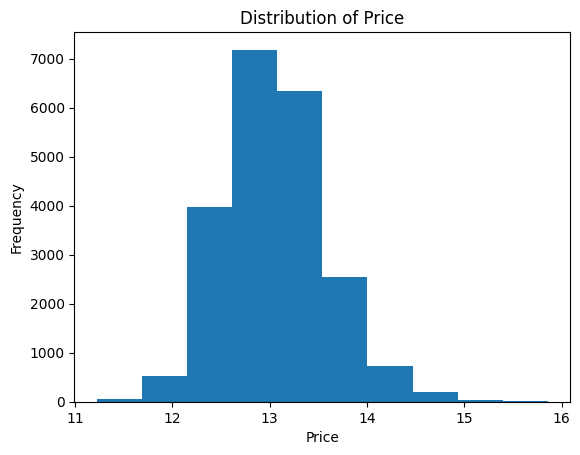

In [8]:
log_price=np.log(housing_df["price"])
plt.hist(log_price)
# Add labels and title
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Distribution of Price")

# Show the plot
plt.show()

#### Task 16: Histogram

Now, let's try to plot histogram of all features.

Hint: You can directly plot all features by call `dataset.hist()`. You may experience a bad layout format. Use

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'sqft_living'}>,
        <Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>],
       [<Axes: title={'center': 'view'}>,
        <Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'grade'}>,
        <Axes: title={'center': 'sqft_above'}>],
       [<Axes: title={'center': 'sqft_basement'}>,
        <Axes: title={'center': 'yr_built'}>,
        <Axes: title={'center': 'yr_renovated'}>,
        <Axes: title={'center': 'zipcode'}>],
       [<Axes: title={'center': 'lat'}>,
        <Axes: title={'center': 'long'}>,
        <Axes: title={'center': 'sqft_living15'}>,
        <Axes: title={'center': 'sqft_lot15'}>]], dtype=object)

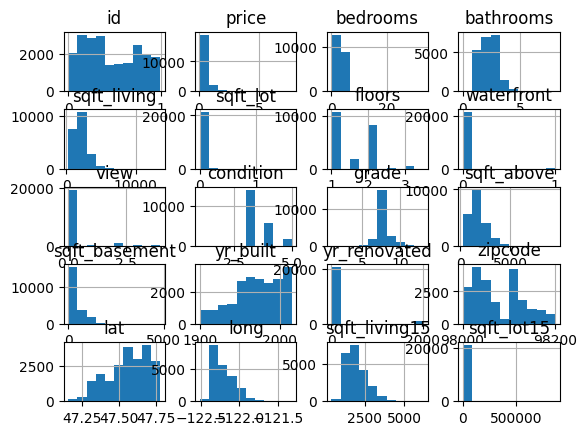

In [9]:
housing_df.hist()

#### Task 17: Scatter Plots
ets explore the relationship between square footage of the living space and the price.

Similar to Price, the sqft features will also be quite skewed and could benefit from a log transformation.

Therefore, let us transform all of the sqft features using a log(x+1) transform. And then draw a scatter plot of log sqft_lot vs log price. Remember to label x axis as `log sqft_living` and y axis as `log price`.

Hint: `scatter()` in `matplotlib` package can be used to draw the scatter plot. `alpha` is an argument for the blending value where 0 is transparent and 1 is opaque. The `log(x+1)` transformation is similar to laptose correction, which can help you overcome the issue of log(0). This can be used when x is ranging between (0, $\infty$). It won't help when x is ranging ($-\infty,\infty$).

In [10]:
housing_df["log_sqft_living"] = np.log1p(housing_df["sqft_living"])


In [12]:
housing_df["log_price"] = np.log1p(housing_df["price"])

#### Task 18: Boxplots
***Boxplots*** can show the difference of a numeric value across levels of a categorical one

Let's explore the feature `condition`, since we dont know if 1 is good or bad! Plot the boxplot of `log_price` for different values of `condition`.

Hint: use the `boxplot()` function in `pandas` package.It is inherit from `matplotlib`, which means most of the `matplotlib` function can be used together with the `boxplot` in `pandas`. Remember to name the title as "Price vs, Condition" and set the y axis as "log_price"

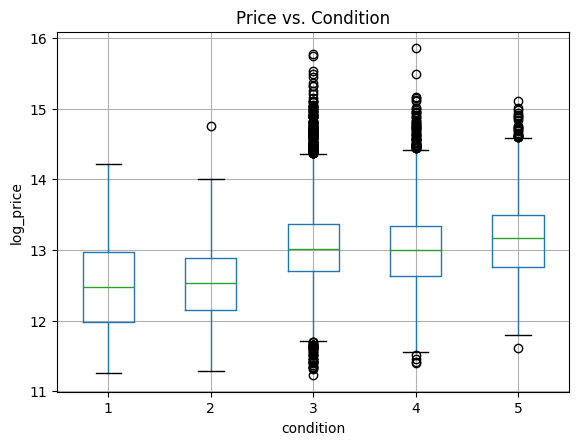

In [13]:
housing_df.boxplot(column="log_price", by="condition")

# Set the title and axis labels
plt.title("Price vs. Condition")
plt.suptitle("")  # Removes the automatic 'Boxplot grouped by condition'
plt.ylabel("log_price")
plt.xlabel("condition")

# Show the plot
plt.show()

#### Task 19: Heatmaps

Heatmap can be used to visualize numeric relationship, such as correlations.

**Structure:**
- A correlation table for p variables has p rows and p columns.
- Represents all pairwise correlations between variables.

**Color Coding:**
- Darker shades indicate larger/smaller value, which is usually stronger (positive or negative) correlations.
- Easier and faster to interpret than scanning numerical values.

Now, let's restrict the correlations to numeric features. And then draw the heatmap with numeric features.

Hint:
1. Identification, Time, Zipcode, location info should be removed. `view` is considered as numeric as rating, even though it is discrete.
2. Use `drop()` in `pandas` to remove columns by name.
3. The correlation can be calculated with `corr()` in `pandas`.
4. For the heatmap, use `heatmap` function in `seaborn`, remember to label the columns and rows with `xticklabels` and `yticklabels`
5. You can always improve your graph by changing parameters `vmin=-1`,`vmax=1` and `cmap = RdBu`
6. Like always, the figure function in `pandas` and `seaborn` can be combined with `matplotlib`.


In [15]:
numeric_df = housing_df.drop(columns=["id", "date", "zipcode", "lat", "long"])
corr = numeric_df.corr()

<Axes: >

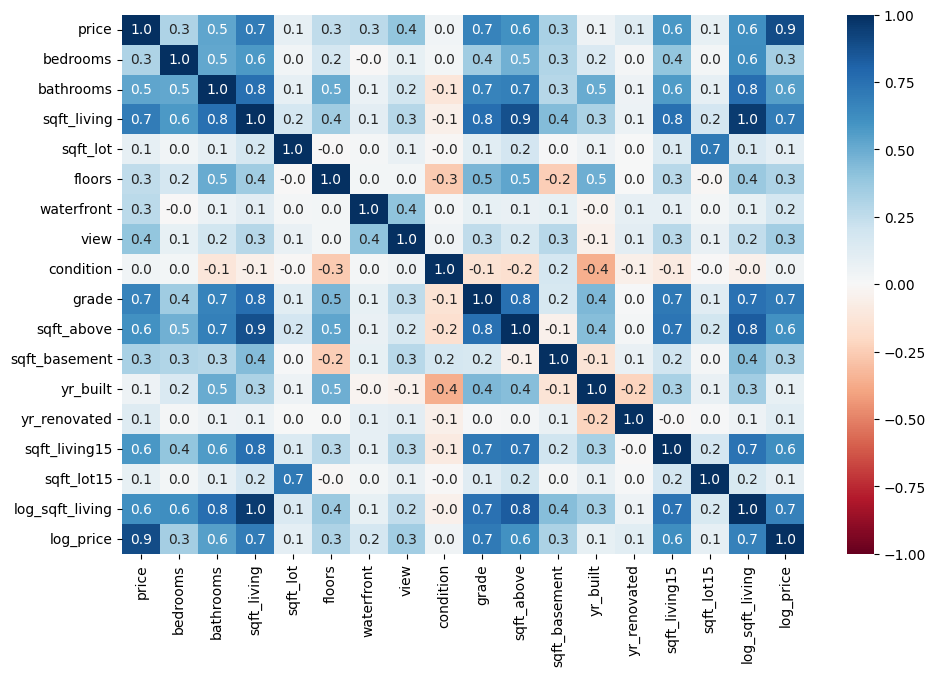

In [16]:
# This will include more information about values for readability.
fig,ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax, vmin=-1, vmax=1)

### Multidimensional Visualization

The enhancement of basic plots by incorporating features such as color, size, and multiple panels. These additions allow for the visualization of more than one or two variables at a time, providing a richer understanding of complex information.



#### Optional Task: Scatter Plot

Here we will use color to represent the `view` feature, and plotting character to represent `waterfront` in the scale of price and sqft.

Hint:
1. Use `scatterplot` in `seaborn` for a better view.
2. `hue` parameter will group variable that will produce points with different colors. `style` parameter will group variable that will produce points with different markers. You can also check other parameters.
3. You would need `legend` for clear label. You can set the `fontsize=small` and `loc=upper left`


#### Optional Task: Heatmap
Like we talked about in Task 6, heatmap is good to present multiple numeric values. Therefore, when you have a lot of points the plots can get very crowded with overplotting,  one technique to deal with this is to create a heatmap.

Still let's still focus on `view`. Here we try to plot the average view by `sqft_living` and `log_price` in heatmap.

Hint:
1. Specify the bins for the y `log_price` and x `sqft_living`. Let's say, set the xbins range from 5.5 to 9.5 and the interval is 0.2. ybins ranging from 11 to 16 and interval is 0.2
2. Heatmap is actually a table, you can imagine the x-axis as the column name and y axis as the table index, and the heatmap itself is the value in table. Therefore, we need to create a pivot table before plotting it. Here we use `pivot_table` in `pandas`
3. We need to reverse the y-axis so that smaller y value at the bottom.
4. Now you can draw the `heatmap` with `seaborn`. Remember to put the value annotation in heatmap, also the xlabel and ylabel.

#### Optional Task: Small Multiple Plots
Another way to show multiple dimensions is called a _small multiples_ plot, where one of the features is used to create different "panels" of plots that allow you to compare relationships across panels.

Let's show the `sqft_living` and `log_price` based on different `grade`

Hint:
1. `FacetGrid` in `seaborn` can be used to set up a grid graph holder
2. combine `map` with `scatterplot` and set parameter  `sqft_living` and `log_price` to construct the plot
3. Remember to add legend so it tells you what the graph represents, which grade it is

#### Optional Task: Scatter Plot Matrix
A special plot that uses scatter plots with multiple panels is the **scatter plot matrix**. In it, all pairwise scatter plots are shown in a single display. The panels in a matrix scatter plot are organized in a special way, such that each column and each row correspond to a variable, thereby the intersections create all the possible pairwise scatter plots.

Let's try to create a plot with `log_price`,`sqft_lot`,`sqft_living`,`grade` for recent house, year build > 2010.

Hint:
1. Filter the dataset with `yr_built>2010`
2. Select columns `log_price`,`sqft_lot`,`sqft_living`,`grade`
3. Use `pairplot` in `seaborn`

### Plotly for Interactive Plots


Now, let's look into something fancy - Interactive Plots! Interactive plots allow you to quickly identify specific points that might be of interest. You can define the features that show up on mouse-over. It uses plots from `plotly` package, another visualization library. `plotly` allows for interactive identification - to see which points are which.

The [plotly home page](https://plotly.com/python/) has many different ideas and inspiration for other types of visualizations.  There are infinite possibilities!  Play around with different visualizations for your own needs.


In [ ]:
import plotly.express as px


#Adding a new column for index
housing_df_recent['Index'] = housing_df.id

# Create an interactive scatterplot using plotly
fig = px.scatter(housing_df_recent,  x='sqft_living', y='log_price',  title='SQFT v PRICE (color=floors)',color='floors',
                 hover_data={'floors': False,
                             'waterfront': ':.2f',
                             'condition': ':.2f',
                             'Index': True
                             },)

# Customize layout
fig.update_layout(
    xaxis_title='log sqft_living',
    yaxis_title='log price',
)
fig.update_layout(height=500)

# Display the interactive scatterplot
fig.show()


In [ ]:
import plotly.express as px

fig = px.scatter_mapbox(housing_df_recent, lat="lat", lon="long", color="log_price",
                        size="log_price", color_continuous_scale=px.colors.sequential.Viridis,
                        size_max=5, zoom=9, mapbox_style="carto-positron",
                        hover_data=['bedrooms', 'bathrooms', 'sqft_living','price'])
fig.show()